In [108]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

#importing the data
df = pd.read_csv('chicagocrime.csv', dtype=unicode)
df[:3]

Populating the interactive namespace from numpy and matplotlib


,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,4506608,9878952,HX529642,12/4/2014 9:30,010XX E 47TH ST,497,BATTERY,AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON,APARTMENT,FALSE,...,2,4,39,04B,1183896,1874058,2014,41.8095966,-87.60101633,"(41.809597, -87.601016)"
1,561379,2514319,HH857213,12/24/2002 9:00,055XX W CONGRESS PKWY,1320,CRIMINAL DAMAGE,TO VEHICLE,OTHER,FALSE,...,15,29,25,14,1139530,1897135,2002,41.87384547,-87.76318349,"(41.873845, -87.763183)"
2,5058884,3891396,HL266026,3/31/2005 11:46,050XX N KIMBALL AVE,141C,WEAPONS VIOLATION,UNLAWFUL USE OTHER DANG WEAPON,"SCHOOL, PUBLIC, GROUNDS",TRUE,...,17,39,13,15,1152801,1933422,2005,41.97316782,-87.71349527,"(41.973168, -87.713495)"


# Top Crime by each District

In [109]:
#use district as index, get value counts for primary type, find max primary type
groupby_d_pt = df.groupby(['District','Primary Type'])['Primary Type'].count()
groupby_d_pt

unstack = groupby_d_pt.unstack('Primary Type')
unstack['sum'] = unstack.sum(axis=1)

df_new = unstack.loc[:,"ARSON":"WEAPONS VIOLATION"].div(unstack["sum"], axis=0)
top_categories = df_new.fillna(0).T.idxmax().to_frame()
top_counts = df_new.fillna(0).T.max().to_frame()

final = top_categories.merge(top_counts, how='inner', left_index=True, right_index=True)
final.columns = ['Primary Type','%']
final.to_csv('PrimaryTypeDistrict.csv', sep=',' )
final

,Primary Type,%
District,,
1,THEFT,0.448472
10,BATTERY,0.201969
11,NARCOTICS,0.292383
12,THEFT,0.279196
14,THEFT,0.279937
15,NARCOTICS,0.267652
16,THEFT,0.241846
17,THEFT,0.255879
18,THEFT,0.404797


# Top Location for Crimes by District

In [110]:
#use district as index, get value counts for primary type, find max primary type
groupby_d_ld = df.groupby(['District','Location Description'])['Location Description'].count()
groupby_d_ld

unstack1= groupby_d_ld.unstack('Location Description')
unstack1['sum'] = unstack1.sum(axis=1)
unstack1

df_newld = unstack1.loc[:,"ABANDONED BUILDING":"YARD"].div(unstack1["sum"], axis=0)
top_categoriesld = df_newld.fillna(0).T.idxmax().to_frame()
top_countsld = df_newld.fillna(0).T.max().to_frame()

finalld = top_categoriesld.merge(top_countsld, how='inner', left_index=True, right_index=True)
finalld.columns = ['Location Description','%']

finalld.to_csv('LocationDistrict.csv', sep=',' )
finalld

,Location Description,%
District,,
1,STREET,0.167686
10,STREET,0.285827
11,STREET,0.292455
12,STREET,0.334923
14,STREET,0.303175
15,STREET,0.266913
16,STREET,0.237832
17,STREET,0.271300
18,STREET,0.220240


# Top Locations Per Crime Type


In [111]:
groupby_pt_ld = df.groupby(['Primary Type', 'Location Description'])['Location Description'].count()
groupby_pt_ld

unstack2= groupby_pt_ld.unstack('Location Description')
unstack2['sum'] = unstack2.sum(axis=1)
unstack2

df_new2 = unstack2.loc[:,"ABANDONED BUILDING":"YARD"].div(unstack2["sum"], axis=0)
top_categories2 = df_new2.fillna(0).T.idxmax().to_frame()
top_counts2 = df_new2.fillna(0).T.max().to_frame()

final2 = top_categories2.merge(top_counts2, how='inner', left_index=True, right_index=True)
final2.columns = ['Location Description','%']

final2.to_csv('PrimaryTypeLocations.csv', sep=',' )
final2

,Location Description,%
Primary Type,,
ARSON,VEHICLE NON-COMMERCIAL,0.310924
ASSAULT,STREET,0.201878
BATTERY,RESIDENCE,0.210723
BURGLARY,RESIDENCE,0.339034
CRIM SEXUAL ASSAULT,RESIDENCE,0.302521
CRIMINAL DAMAGE,STREET,0.361746
CRIMINAL TRESPASS,RESIDENCE,0.134519
DECEPTIVE PRACTICE,RESIDENCE,0.280139
DOMESTIC VIOLENCE,APARTMENT,1.000000


# Top Descriptions per Primary Type

In [112]:
groupby_pt_d = df.groupby(['Primary Type', 'Description'])['Description'].count()
groupby_pt_d

unstack3= groupby_pt_d.unstack('Description')
unstack3['sum'] = unstack3.sum(axis=1)
unstack3

df_new3 = unstack3.loc[:,"$500 AND UNDER":"WIREROOM/SPORTS"].div(unstack3["sum"], axis=0)
top_categories3 = df_new3.fillna(0).T.idxmax().to_frame()
top_counts3 = df_new3.fillna(0).T.max().to_frame()

final3 = top_categories3.merge(top_counts3, how='inner', left_index=True, right_index=True)
final3.columns = ['Description','%']

final3.to_csv('PrimaryTypeDescriptions.csv', sep=',' )
final3


,Description,%
Primary Type,,
ARSON,BY FIRE,0.655462
ASSAULT,SIMPLE,0.695097
BATTERY,DOMESTIC BATTERY SIMPLE,0.423618
BURGLARY,FORCIBLE ENTRY,0.684039
CRIM SEXUAL ASSAULT,NON-AGGRAVATED,0.512605
CRIMINAL DAMAGE,TO VEHICLE,0.469161
CRIMINAL TRESPASS,TO LAND,0.610339
DECEPTIVE PRACTICE,CREDIT CARD FRAUD,0.195690
DOMESTIC VIOLENCE,DOMESTIC VIOLENCE,1.000000


# Districts with the most crimes

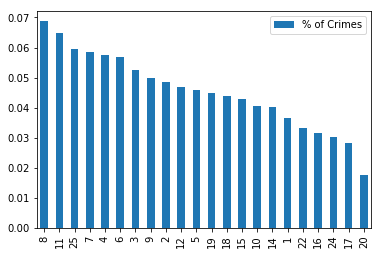

In [137]:
districtcounts = df['District'].value_counts()

pd.to_numeric(districtcounts)
newdf = districtcounts.to_frame()
newdf.columns = ['Count']
newdf['% of Crimes'] = newdf['Count'] /  newdf['Count'].sum()

del newdf['Count']
newdf.sort_values('% of Crimes')
newdf.plot(kind='bar')